In [1]:
# the goal is to predict the price for individual flight

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preparing our Training Dataset and Testing Dataset

In [3]:
data = pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
# basic information about the test data
data_test = pd.read_excel('Test_set.xlsx')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [5]:
# basic information about the train data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


<AxesSubplot:ylabel='Frequency'>

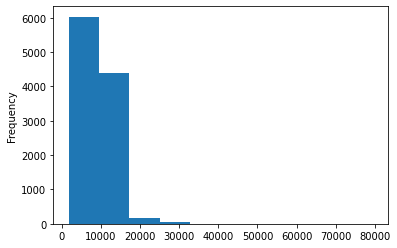

In [6]:
# take a look at our independent values (target feature)
print(data['Price'].describe())
data['Price'].plot.hist()

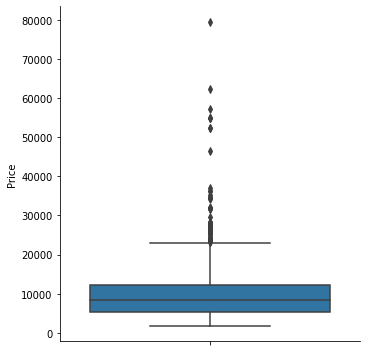

In [7]:
# check for outliers
sns.catplot(y = 'Price', data = data, kind = 'box')
plt.show()

In [8]:
# function to remove outliers
def remove_outliers(data, columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    data = data.loc[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR)))]
    return data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10589 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10589 non-null  object
 1  

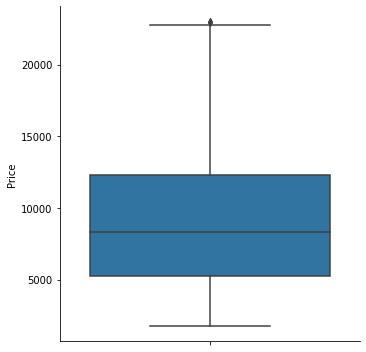

In [9]:
# remove outliers and then replot the boxplot
newdata = data.copy()
print(newdata.info())
newdata = remove_outliers(newdata, 'Price')
print(newdata.info())
sns.catplot(y = 'Price', data = newdata, kind = 'box')
plt.show()

## Data Cleaning

In [10]:
# drop missing value
newdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
newdata.dropna(inplace = True)
newdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
newdata = newdata.reset_index(drop = True) # by setting drop = True, we ignore the old index
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10588 entries, 0 to 10587
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10588 non-null  object
 1   Date_of_Journey  10588 non-null  object
 2   Source           10588 non-null  object
 3   Destination      10588 non-null  object
 4   Route            10588 non-null  object
 5   Dep_Time         10588 non-null  object
 6   Arrival_Time     10588 non-null  object
 7   Duration         10588 non-null  object
 8   Total_Stops      10588 non-null  object
 9   Additional_Info  10588 non-null  object
 10  Price            10588 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 910.0+ KB


In [13]:
# concat both train and test features and isolate the target 

In [14]:
target = newdata['Price'] # train data index end in 10587
newdata = newdata.drop(['Price'], axis = 1)

In [15]:
df = pd.concat([newdata, data_test], ignore_index=True, sort=False)

In [16]:
# to make sure the index is still in order, ps index > 10587 are from test table
df.iloc[10583:10588][:]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
10583,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10584,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10585,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10586,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info
10587,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info


In [17]:
newdata.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
10583,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10584,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10585,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10586,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info
10587,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info


In [18]:
# convert datetime 
datetime_col = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
for i in datetime_col:
    df[i] = pd.to_datetime(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13259 entries, 0 to 13258
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13259 non-null  object        
 1   Date_of_Journey  13259 non-null  datetime64[ns]
 2   Source           13259 non-null  object        
 3   Destination      13259 non-null  object        
 4   Route            13259 non-null  object        
 5   Dep_Time         13259 non-null  datetime64[ns]
 6   Arrival_Time     13259 non-null  datetime64[ns]
 7   Duration         13259 non-null  object        
 8   Total_Stops      13259 non-null  object        
 9   Additional_Info  13259 non-null  object        
dtypes: datetime64[ns](3), object(7)
memory usage: 1.0+ MB


In [19]:
# divide Date_of_Journey into two columns: date, month
df['journey_date'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month

# divide Dep_Time into two columns: hours, minutes
df['Dep_hours'] = df['Dep_Time'].dt.hour
df['Dep_minutes'] = df['Dep_Time'].dt.minute

# divide Arrival_time into two columns: hours, minutes
df['Arrival_hours'] = df['Arrival_Time'].dt.hour
df['Arrival_minutes'] = df['Arrival_Time'].dt.minute

In [20]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13259 entries, 0 to 13258
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13259 non-null  object
 1   Source           13259 non-null  object
 2   Destination      13259 non-null  object
 3   Route            13259 non-null  object
 4   Duration         13259 non-null  object
 5   Total_Stops      13259 non-null  object
 6   Additional_Info  13259 non-null  object
 7   journey_date     13259 non-null  int64 
 8   journey_month    13259 non-null  int64 
 9   Dep_hours        13259 non-null  int64 
 10  Dep_minutes      13259 non-null  int64 
 11  Arrival_hours    13259 non-null  int64 
 12  Arrival_minutes  13259 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.3+ MB


#### working on Duration columns

In [21]:
# working on Duration columns
# formating the duration with both hours and mins
duration = df['Duration'].values.tolist()
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m' 
        else:
            duration[i] = '0h ' + duration[i]


In [22]:
df['Duration'] = duration
df.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_date,journey_month,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes
13254,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
13255,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
13256,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,3,6,21,50,4,25
13257,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,3,6,4,0,19,15
13258,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,14h 20m,1 stop,No info,15,6,4,55,19,15


In [23]:
# extract the number from duration and store to new columns
h = []
m = []
for item in duration:
    h.append(item.split(' ')[0][:-1])
    m.append(item.split(' ')[1][:-1])


In [24]:
df['duration_hours'] = h
df['duration_mins'] = m
df.drop(['Duration'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13259 entries, 0 to 13258
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13259 non-null  object
 1   Source           13259 non-null  object
 2   Destination      13259 non-null  object
 3   Route            13259 non-null  object
 4   Total_Stops      13259 non-null  object
 5   Additional_Info  13259 non-null  object
 6   journey_date     13259 non-null  int64 
 7   journey_month    13259 non-null  int64 
 8   Dep_hours        13259 non-null  int64 
 9   Dep_minutes      13259 non-null  int64 
 10  Arrival_hours    13259 non-null  int64 
 11  Arrival_minutes  13259 non-null  int64 
 12  duration_hours   13259 non-null  object
 13  duration_mins    13259 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.4+ MB


In [25]:
df['duration_hours'] = df['duration_hours'].astype('int64')
df['duration_mins'] = df['duration_mins'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13259 entries, 0 to 13258
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13259 non-null  object
 1   Source           13259 non-null  object
 2   Destination      13259 non-null  object
 3   Route            13259 non-null  object
 4   Total_Stops      13259 non-null  object
 5   Additional_Info  13259 non-null  object
 6   journey_date     13259 non-null  int64 
 7   journey_month    13259 non-null  int64 
 8   Dep_hours        13259 non-null  int64 
 9   Dep_minutes      13259 non-null  int64 
 10  Arrival_hours    13259 non-null  int64 
 11  Arrival_minutes  13259 non-null  int64 
 12  duration_hours   13259 non-null  int64 
 13  duration_mins    13259 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.4+ MB


#### working on categorical values

In [26]:
# for categorical data without order, we can use get_dummies()
# for categorical data with order, we can use label-Encoder

In [27]:
# Airline column
Airline = pd.get_dummies(df['Airline'], drop_first = True, prefix = 'airline_')
# Source column
Source = pd.get_dummies(df['Source'], drop_first = True, prefix = 'source_')
# Destination column
Destination = pd.get_dummies(df['Destination'], drop_first = True, prefix="destination_")

In [28]:
# total stops column
df['Total_Stops'].value_counts()
mydict = {'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Total_Stops'] = df['Total_Stops'].map(mydict)

In [29]:
# Additional_Info column
df['Additional_Info'].value_counts() # since most of the data from Additional info does not provide any useful information, we can drop it
df.drop(['Additional_Info'], axis = 1, inplace = True)

In [30]:
# Route column
data1 = df.copy()
data1['Route1'] = data1['Route'].str.split('→').str[0]
data1['Route2'] = data1['Route'].str.split('→').str[1]
data1['Route3'] = data1['Route'].str.split('→').str[2]
data1['Route4'] = data1['Route'].str.split('→').str[3]
data1['Route5'] = data1['Route'].str.split('→').str[4]

data1.isnull().sum() # Route3 - 4 contains missing values

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
journey_date           0
journey_month          0
Dep_hours              0
Dep_minutes            0
Arrival_hours          0
Arrival_minutes        0
duration_hours         0
duration_mins          0
Route1                 0
Route2                 0
Route3              4337
Route4             11318
Route5             13201
dtype: int64

In [31]:
Route_col = ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']
for val in Route_col:
    data1[val].fillna('None', inplace = True)

In [32]:
# using label encoder 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for val in Route_col:
    data1[val] = LE.fit_transform(data1[val])

In [33]:
data1.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'journey_date', 'journey_month', 'Dep_hours', 'Dep_minutes',
       'Arrival_hours', 'Arrival_minutes', 'duration_hours', 'duration_mins',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [34]:
data1.head()

,Airline,Source,Destination,Route,Total_Stops,journey_date,journey_month,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,duration_hours,duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,24,3,22,20,1,10,2,50,0,13,30,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,5,1,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,6,9,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,5,12,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,3,1,16,50,21,35,4,45,0,34,8,13,5


In [35]:
final_df = data1.copy()

final_df.drop(['Airline', 'Source', 'Destination', 'Route'], axis = 1, inplace = True)
final_df.head()
final_df = pd.concat([final_df, Airline, Source, Destination], axis = 1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13259 entries, 0 to 13258
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Total_Stops                                 13259 non-null  int64
 1   journey_date                                13259 non-null  int64
 2   journey_month                               13259 non-null  int64
 3   Dep_hours                                   13259 non-null  int64
 4   Dep_minutes                                 13259 non-null  int64
 5   Arrival_hours                               13259 non-null  int64
 6   Arrival_minutes                             13259 non-null  int64
 7   duration_hours                              13259 non-null  int64
 8   duration_mins                               13259 non-null  int64
 9   Route1                                      13259 non-null  int64
 10  Route2                            

In [36]:
final_df.head()

,Total_Stops,journey_date,journey_month,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,duration_hours,duration_mins,Route1,...,airline__Vistara Premium economy,source__Chennai,source__Delhi,source__Kolkata,source__Mumbai,destination__Cochin,destination__Delhi,destination__Hyderabad,destination__Kolkata,destination__New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,2,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,3,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,2,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# concat the target column with the other manipulated features
train_part = final_df.iloc[:10588][:]
train_part = pd.concat([train_part, target], axis = 1)
train_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10588 entries, 0 to 10587
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Total_Stops                                 10588 non-null  int64
 1   journey_date                                10588 non-null  int64
 2   journey_month                               10588 non-null  int64
 3   Dep_hours                                   10588 non-null  int64
 4   Dep_minutes                                 10588 non-null  int64
 5   Arrival_hours                               10588 non-null  int64
 6   Arrival_minutes                             10588 non-null  int64
 7   duration_hours                              10588 non-null  int64
 8   duration_mins                               10588 non-null  int64
 9   Route1                                      10588 non-null  int64
 10  Route2                            

In [45]:
test_part = final_df.iloc[10588:][:]
test_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 10588 to 13258
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Total_Stops                                 2671 non-null   int64
 1   journey_date                                2671 non-null   int64
 2   journey_month                               2671 non-null   int64
 3   Dep_hours                                   2671 non-null   int64
 4   Dep_minutes                                 2671 non-null   int64
 5   Arrival_hours                               2671 non-null   int64
 6   Arrival_minutes                             2671 non-null   int64
 7   duration_hours                              2671 non-null   int64
 8   duration_mins                               2671 non-null   int64
 9   Route1                                      2671 non-null   int64
 10  Route2                         

## Preprocessing Complete, ready for modeling

#### 1) Feature Importance Check

#### Since our project is categorical In numerical out case, hence This is a regression predictive modeling problem with categorical input variables.

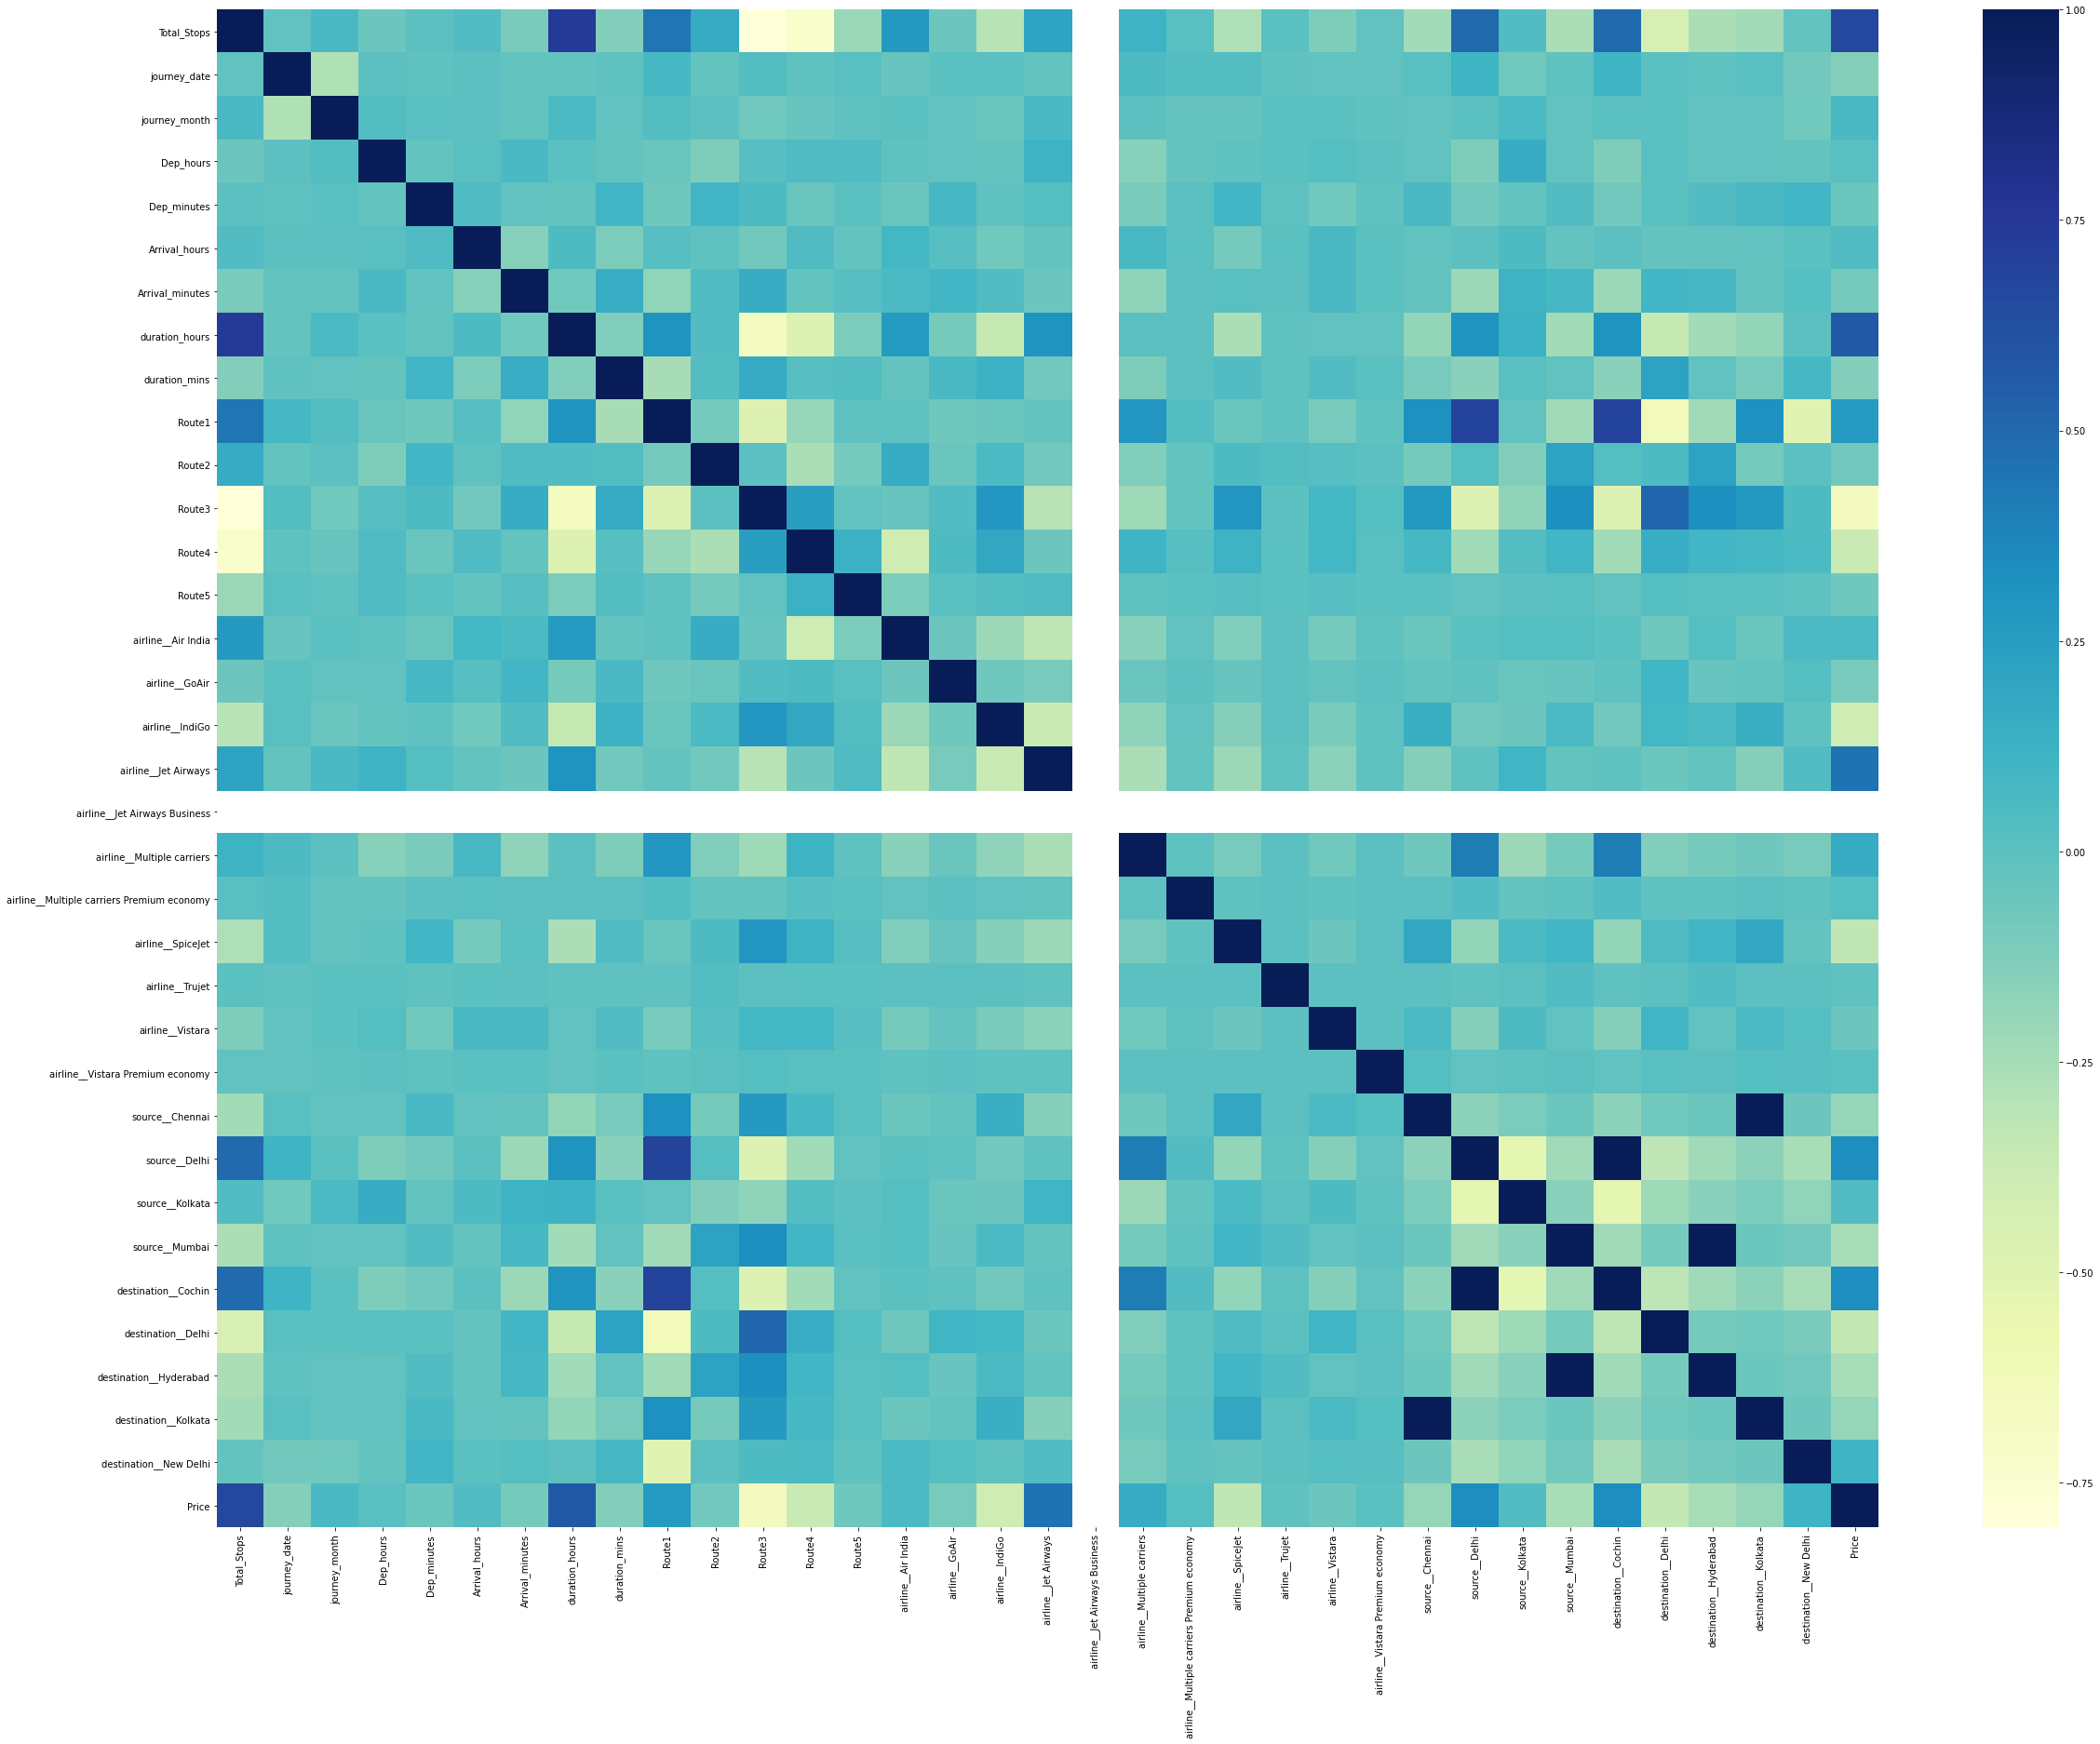

In [52]:
# First check the correlation matrix to see if there exist strong linear relationships
plt.figure(figsize = (40,30))
my_corr = train_part.corr()
sns.heatmap(my_corr, xticklabels = my_corr.columns, yticklabels = my_corr.columns, cmap = 'YlGnBu')
plt.show()

In [53]:
# sorting the correlation coef
my_corr['Price'].sort_values(ascending = False)

Price                                         1.000000
Total_Stops                                   0.667691
duration_hours                                0.574937
airline__Jet Airways                          0.451589
destination__Cochin                           0.333034
source__Delhi                                 0.333034
Route1                                        0.265748
airline__Multiple carriers                    0.161747
destination__New Delhi                        0.105618
journey_month                                 0.069031
airline__Air India                            0.061651
source__Kolkata                               0.037863
Arrival_hours                                 0.037664
airline__Multiple carriers Premium economy    0.021723
Dep_hours                                     0.006989
airline__Vistara Premium economy              0.000267
airline__Trujet                              -0.011364
Dep_minutes                                  -0.052967
airline__V

#### we can see that features like Total_Stops, duration_hours, airline__Jet Airways show positive correlation with our Target features. Meanwhile, the feature Route3, airline_IndiGo, Route4 show negative correlation with our Target variable

In [54]:
# Check for nonlinear Relation feature importance by using RandomForestRegressor

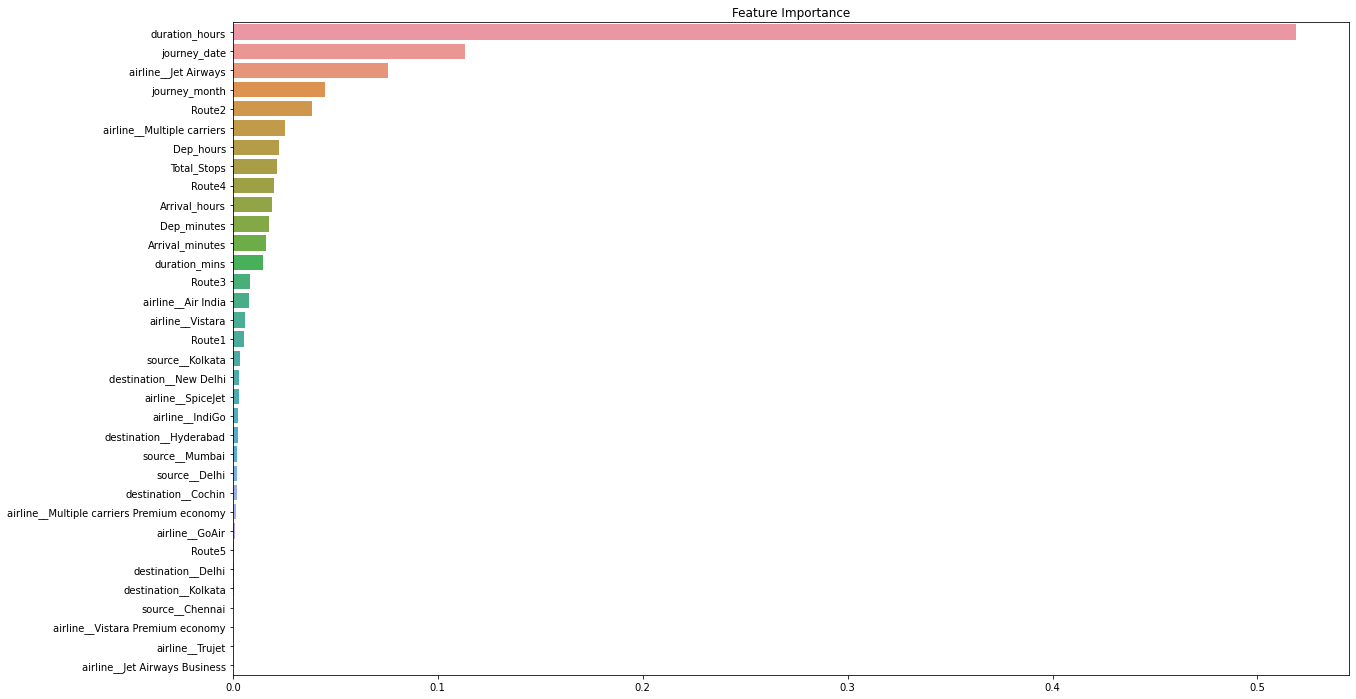

In [55]:
from sklearn.ensemble import RandomForestRegressor
X = train_part.drop(['Price'], axis = 1)
y = train_part['Price']

RF_regressor = RandomForestRegressor()
RF_regressor = RF_regressor.fit(X, y)

importance = pd.Series(data = RF_regressor.feature_importances_, index = X.columns).sort_values(ascending = False)
plt.figure(figsize = (20,12))
plt.title('Feature Importance')
ax = sns.barplot(y = importance.index, x = importance.values, orient = 'h')
plt.show()

#### this tells us that duration_hours has a high correlation with the target variables

#### 2) Split our train_part into train and test to reduce variance

In [98]:
from sklearn.model_selection import train_test_split

X = train_part.loc[:, train_part.columns != 'Price']
y = train_part['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))


X_train shape (7411, 34)
y_train shape (7411,)
X_test shape (3177, 34)
y_test shape (3177,)


In [99]:
# Choose the metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Linear Regression Modeling

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


print('*' * 20 + ' Linear Regression Modeling ' + '*' * 20)
LR_model = LinearRegression()
LR_model.fit(X = X_train, y = y_train)
LR_pred = LR_model.predict(X = X_test)
print('RMSE for Linear Regression is: {}'.format(np.sqrt(mean_squared_error(y_test, LR_pred))))
print('MAE for Linear Regression is: {}'.format(mean_absolute_error(y_test, LR_pred)))
print('R2 score for Linear Regression is: {}'.format(r2_score(y_test, LR_pred)))

******************** Linear Regression Modeling ********************
RMSE for Linear Regression is: 2436.3039786835106
MAE for Linear Regression is: 1840.1873797946294
R2 score for Linear Regression is: 0.6512297156391782


#### Lasso Regression Modeling

In [101]:
from sklearn.linear_model import Lasso


print('*' * 20 + ' Lasso Regression Modeling ' + '*' * 20)
Linear_Lasso = Lasso(alpha = 1)
Linear_Lasso.fit(X_train, y_train)
LL_pred = Linear_Lasso.predict(X = X_test)
print('RMSE for Lasso Regression is: {}'.format(np.sqrt(mean_squared_error(y_test, LL_pred))))
print('MAE for Lasso Regression is: {}'.format(mean_absolute_error(y_test, LL_pred)))
print('R2 score for Lasso Regression is: {}'.format(r2_score(y_test, LL_pred)))

******************** Lasso Regression Modeling ********************
RMSE for Lasso Regression is: 2436.5883978943652
MAE for Lasso Regression is: 1840.422151307011
R2 score for Lasso Regression is: 0.6511482785441802


#### KNeighers Regression Modeling 

In [102]:
from sklearn.neighbors import KNeighborsRegressor

print('*' * 20 + ' KNN Regression Modeling ' + '*' * 20)
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X = X_test)
print('RMSE for KNN Regression is: {}'.format(np.sqrt(mean_squared_error(y_test, KNN_pred))))
print('MAE for KNN Regression is: {}'.format(mean_absolute_error(y_test, KNN_pred)))
print('R2 score for KNN Regression is: {}'.format(r2_score(y_test, KNN_pred)))

******************** KNN Regression Modeling ********************
RMSE for KNN Regression is: 2358.681217135272
MAE for KNN Regression is: 1652.1544853635505
R2 score for KNN Regression is: 0.673099922283457


#### Decision Tree Regression

In [103]:
from sklearn.tree import DecisionTreeRegressor

print('*' * 20 + ' DecisionTree Regression Modeling ' + '*' * 20)
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X = X_test)
print('RMSE for DecisionTree Regression is: {}'.format(np.sqrt(mean_squared_error(y_test, DT_pred))))
print('MAE for DecisionTree Regression is: {}'.format(mean_absolute_error(y_test, DT_pred)))
print('R2 score for DecisionTree Regression is: {}'.format(r2_score(y_test, DT_pred)))

******************** DecisionTree Regression Modeling ********************
RMSE for DecisionTree Regression is: 2154.853651025493
MAE for DecisionTree Regression is: 1279.1258787115728
R2 score for DecisionTree Regression is: 0.7271574583826823


#### RandomForest Regression 

In [105]:
from sklearn.ensemble import RandomForestRegressor

print('*' * 20 + ' RandomForest Regression Modeling ' + '*' * 20)
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X = X_test)
print('RMSE for RandomForest Regression is: {}'.format(np.sqrt(mean_squared_error(y_test, RF_pred))))
print('MAE for RandomForest Regression is: {}'.format(mean_absolute_error(y_test, RF_pred)))
print('R2 score for RandomForest Regression is: {}'.format(r2_score(y_test, RF_pred)))

******************** RandomForest Regression Modeling ********************
RMSE for RandomForest Regression is: 1741.3255163541417
MAE for RandomForest Regression is: 1115.2582588756852
R2 score for RandomForest Regression is: 0.8218292309964117


#### Gradient Boosting Regression

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

print('*' * 20 + ' GradientBoosting Regression Modeling ' + '*' * 20)
GB = RandomForestRegressor()
GB.fit(X_train, y_train)
GB_pred = GB.predict(X = X_test)
print('RMSE for Gradient Boosting Regression is: {}'.format(np.sqrt(mean_squared_error(y_test, GB_pred))))
print('MAE for Gradient Boosting Regression is: {}'.format(mean_absolute_error(y_test, GB_pred)))
print('R2 score for Gradient Boosting Regression is: {}'.format(r2_score(y_test, GB_pred)))

******************** GradientBoosting Regression Modeling ********************
RMSE for Gradient Boosting Regression is: 1743.4388121312506
MAE for Gradient Boosting Regression is: 1116.2782500725589
R2 score for Gradient Boosting Regression is: 0.8213965077524124


#### Since Random Forest return the highest R2 score, we then decide to hyper tunning this model

In [119]:
from sklearn.model_selection import RandomizedSearchCV

Hyper_Parameters = {
    'n_estimators': [100, 140, 180, 220, 260],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5,10,15,20],
}

rf = RandomForestRegressor()
rf_rs_cv = RandomizedSearchCV(estimator = rf, param_distributions = Hyper_Parameters, cv = 10, n_jobs = -1)
rf_rs_cv.fit(X_train, y_train)
rf_rs_cv.best_params_

/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 140, 'max_features': 'auto', 'max_depth': 15}

In [120]:
best_paramters = rf_rs_cv.best_params_

final_model = RandomForestRegressor(n_estimators = 140, max_features = 'auto', max_depth = 15)
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X = X_test)
print('RMSE for Tunned Random Forest Regression is: {}'.format(np.sqrt(mean_squared_error(y_test, final_pred))))
print('MAE for Tunned Random Forest Regression is: {}'.format(mean_absolute_error(y_test, final_pred)))
print('R2 score for Tunned Random Forest Regression is: {}'.format(r2_score(y_test, final_pred)))

RMSE for Tunned Random Forest Regression is: 1630.3056620993145
MAE for Tunned Random Forest Regression is: 1083.8106413664475
R2 score for Tunned Random Forest Regression is: 0.8438238903743845


#### Using the Tunned Model to predict our test set

In [122]:
test_pred = final_model.predict(X = test_part)
pd.DataFrame(test_pred)

,0
0,11153.257486
1,4236.951044
2,13719.295367
3,10119.465478
4,4143.492479
...,...
2666,10242.849693
2667,5015.847708
2668,16565.958877
2669,13486.782723
